
# 1. Setup and Data Preparation

In [ ]:
# Second cell - now import everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, auc,
                             precision_recall_curve, average_precision_score)
from imblearn.over_sampling import SMOTE
from scipy.stats import loguniform, randint

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# Rest of your original code...
# %%
# Load and clean data
data = pd.read_csv('heart_disease.csv')
if 'patient id' in data.columns:
    data.drop('patient id', axis=1, inplace=True)

# Feature engineering
data['age_cholesterol'] = data['age'] * data['cholesterol']
data['max_hr_oldpeak'] = data['max heart rate'] * data['oldpeak']

# Define features and target
features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
            'fasting blood sugar', 'resting ecg', 'max heart rate',
            'exercise angina', 'oldpeak', 'ST slope', 'age_cholesterol', 'max_hr_oldpeak']
target = 'heart disease'
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Pandas version: 2.2.2
Numpy version: 2.0.2


# 2. Hyperparameter Tuning

In [ ]:
# Hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': loguniform(1e-3, 100),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    },
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': [None] + list(np.arange(5, 30, 5)),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': randint(50, 300),
        'learning_rate': loguniform(1e-3, 0.3),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'XGBoost': {
        'n_estimators': randint(50, 300),
        'learning_rate': loguniform(1e-3, 0.3),
        'max_depth': randint(3, 10),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    },
    'SVM': {
        'C': loguniform(1e-3, 100),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'] + list(loguniform(1e-3, 1).rvs(5)),
        'degree': [2, 3, 4]
    },
    'KNN': {
        'n_neighbors': randint(1, 30),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}


# Initialize models


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}


# 3. Model Evaluation with pca



=== MODEL TUNING WITH PCA ===


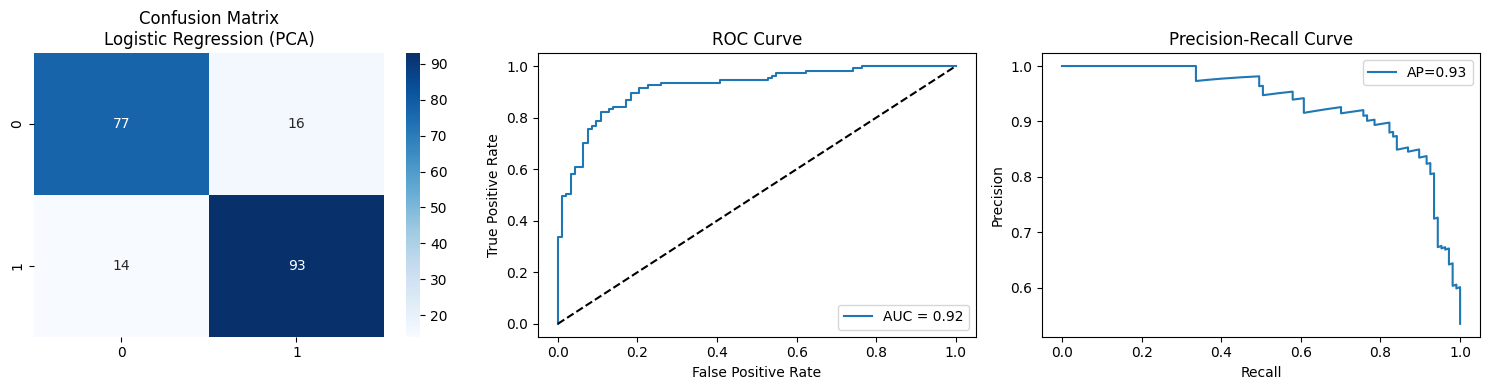


=== Logistic Regression (PCA) ===
Best parameters: {'C': np.float64(0.03890607098705633), 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
CV Accuracy: 0.8406
Test Accuracy: 0.8500
Precision: 0.8499
Recall: 0.8500
F1 Score: 0.8499
ROC AUC: 0.9180


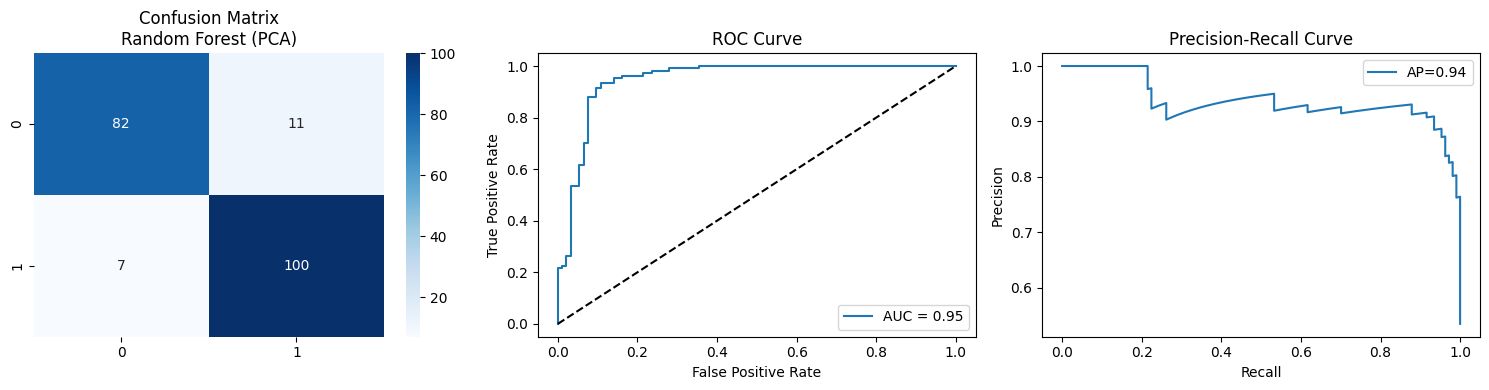


=== Random Forest (PCA) ===
Best parameters: {'max_depth': np.int64(10), 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
CV Accuracy: 0.8730
Test Accuracy: 0.9100
Precision: 0.9104
Recall: 0.9100
F1 Score: 0.9098
ROC AUC: 0.9471


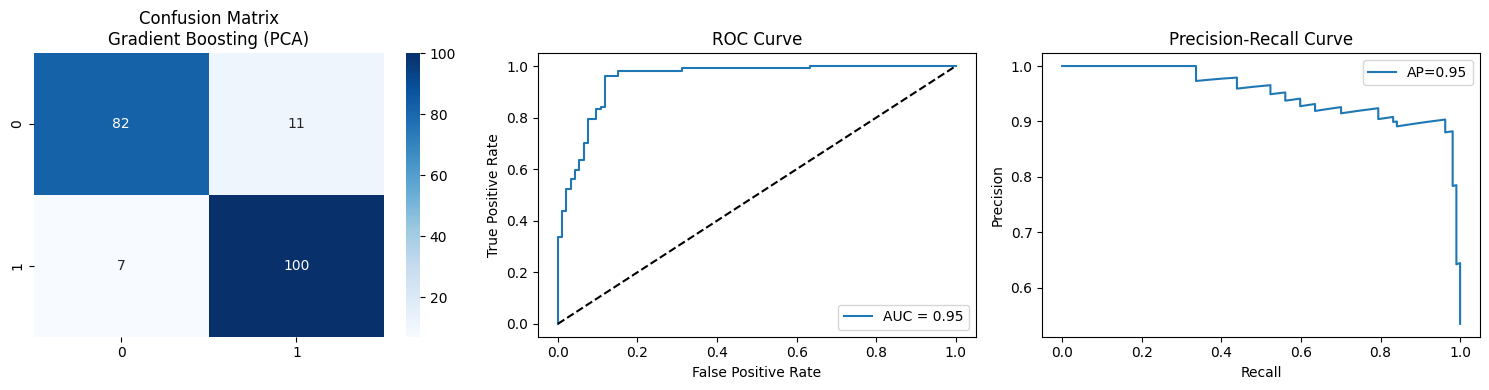


=== Gradient Boosting (PCA) ===
Best parameters: {'learning_rate': np.float64(0.021739614639581923), 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 209}
CV Accuracy: 0.8822
Test Accuracy: 0.9100
Precision: 0.9104
Recall: 0.9100
F1 Score: 0.9098
ROC AUC: 0.9504


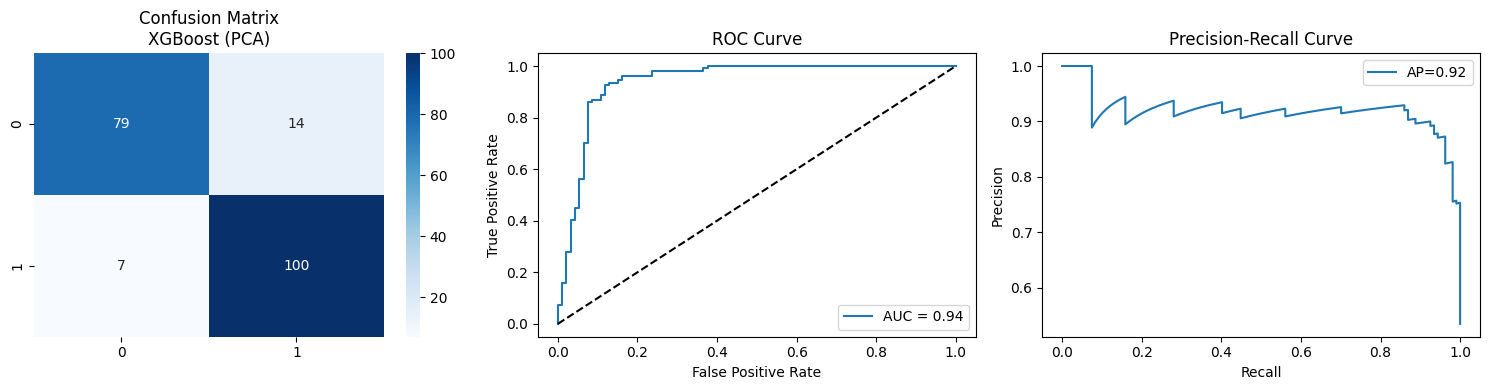


=== XGBoost (PCA) ===
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': np.float64(0.01994942877962023), 'max_depth': 9, 'n_estimators': 219, 'subsample': 1.0}
CV Accuracy: 0.8857
Test Accuracy: 0.8950
Precision: 0.8964
Recall: 0.8950
F1 Score: 0.8946
ROC AUC: 0.9393


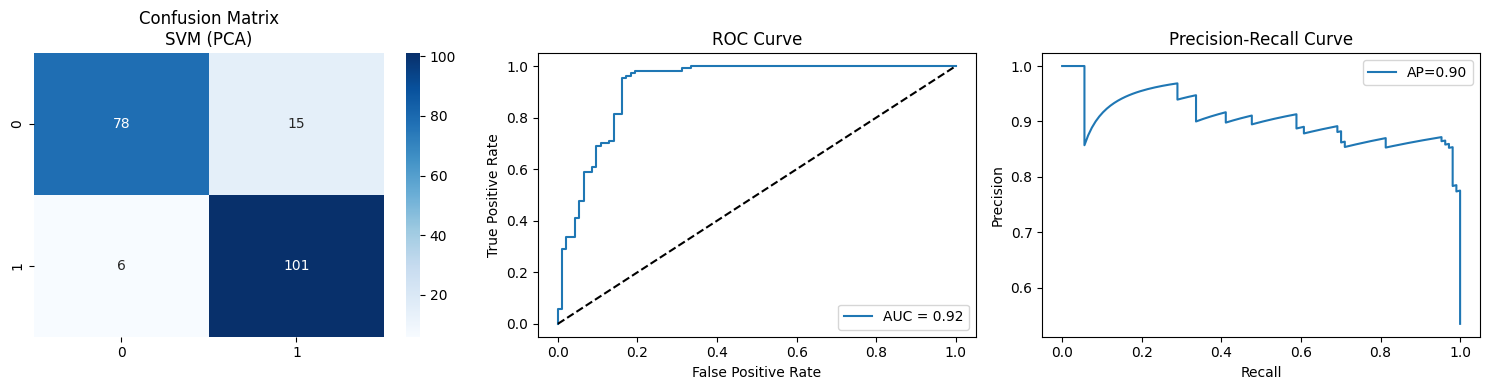


=== SVM (PCA) ===
Best parameters: {'C': np.float64(1.8004668413421294), 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
CV Accuracy: 0.8695
Test Accuracy: 0.8950
Precision: 0.8976
Recall: 0.8950
F1 Score: 0.8944
ROC AUC: 0.9224


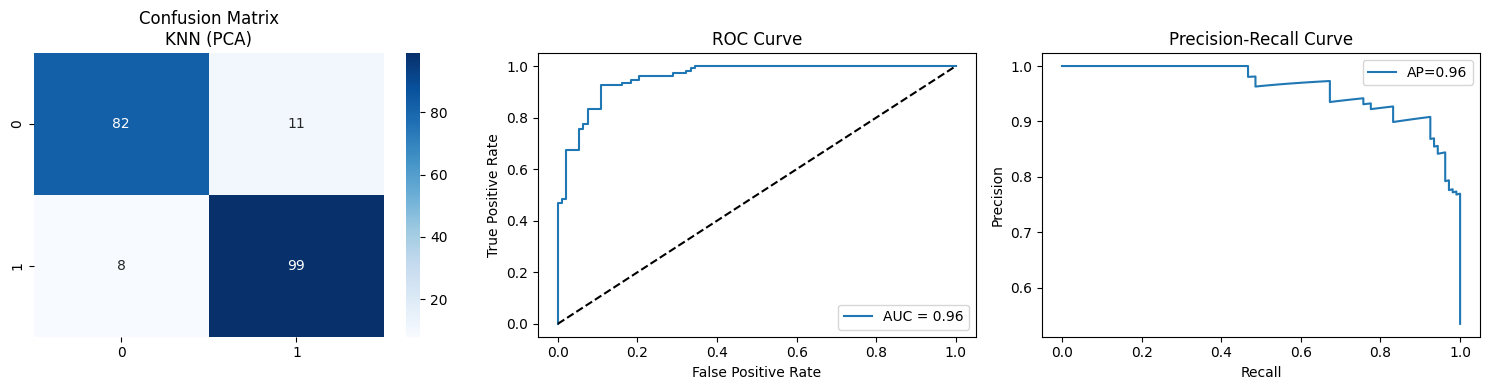


=== KNN (PCA) ===
Best parameters: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
CV Accuracy: 0.8845
Test Accuracy: 0.9050
Precision: 0.9052
Recall: 0.9050
F1 Score: 0.9049
ROC AUC: 0.9567


In [ ]:
def tune_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, model_name, n_iter=50):
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    roc_auc = None
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

    # Visualization
    plt.figure(figsize=(15, 4))

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix\n{model_name}')

    if y_proba is not None:
        # ROC Curve
        plt.subplot(1, 3, 2)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()

        # Precision-Recall Curve
        plt.subplot(1, 3, 3)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
        plt.plot(recall_curve, precision_curve, label=f'AP={avg_precision:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"\n=== {model_name} ===")
    print(f"Best parameters: {search.best_params_}")
    print(f"CV Accuracy: {search.best_score_:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")

    return {
        'model': best_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'best_params': search.best_params_
    }

# %%
# Run hyperparameter tuning with PCA
print("=== MODEL TUNING WITH PCA ===")
pca_results = {}
for name, model in models.items():
    pca_results[name] = tune_and_evaluate(
        model,
        param_grids[name],
        X_train_pca, y_train,
        X_test_pca, y_test,
        f"{name} (PCA)"
    )


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score  # Add these imports at the top



# Create comprehensive voting classifier with PCA using all models
voting_clf_pca_all = VotingClassifier(
    estimators=[

        ('rf', pca_results['Random Forest']['model']),
        ('gb', pca_results['Gradient Boosting']['model']),
        ('xgb', pca_results['XGBoost']['model'])

    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf_pca_all.fit(X_train_pca, y_train)

# Make predictions and evaluate
y_pred_pca_all = voting_clf_pca_all.predict(X_test_pca)

# Store results - now using the properly imported metrics
pca_results['Voting Classifier (All Models)'] = {
    'model': voting_clf_pca_all,
    'accuracy': accuracy_score(y_test, y_pred_pca_all),
    'precision': precision_score(y_test, y_pred_pca_all),
    'recall': recall_score(y_test, y_pred_pca_all),
    'f1': f1_score(y_test, y_pred_pca_all)
}

print(f"\nVoting Classifier with PCA (All Models) Accuracy: {accuracy_score(y_test, y_pred_pca_all):.4f}")
print(classification_report(y_test, y_pred_pca_all))


Voting Classifier with PCA (All Models) Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        93
           1       0.90      0.95      0.93       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



#  Model Evaluation without pca



=== Running models without PCA ===

Tuning Logistic Regression (No PCA)


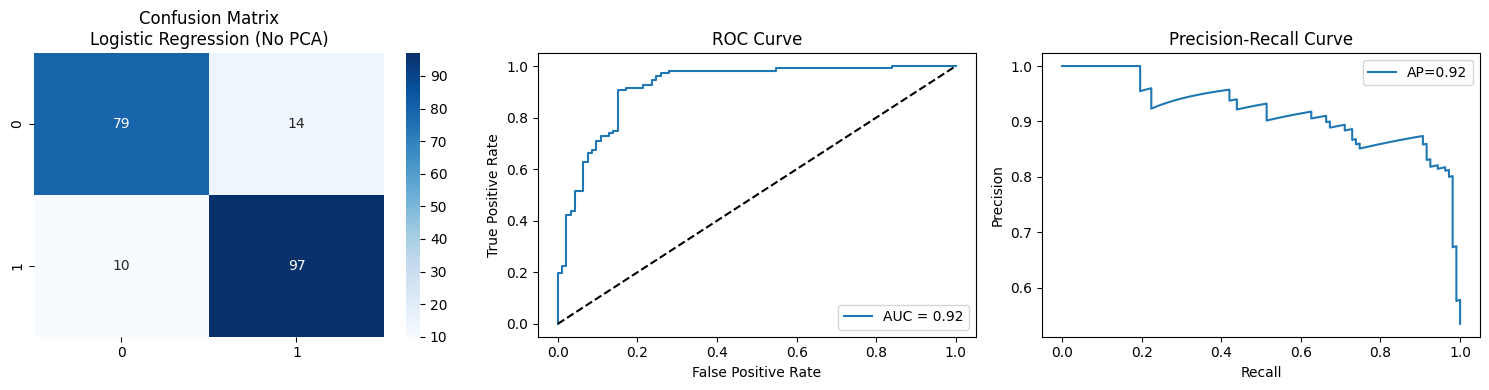


=== Logistic Regression (No PCA) ===
Best parameters: {'C': np.float64(0.03890607098705633), 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
CV Accuracy: 0.8510
Test Accuracy: 0.8800
Precision: 0.8803
Recall: 0.8800
F1 Score: 0.8798
ROC AUC: 0.9181

Tuning Random Forest (No PCA)


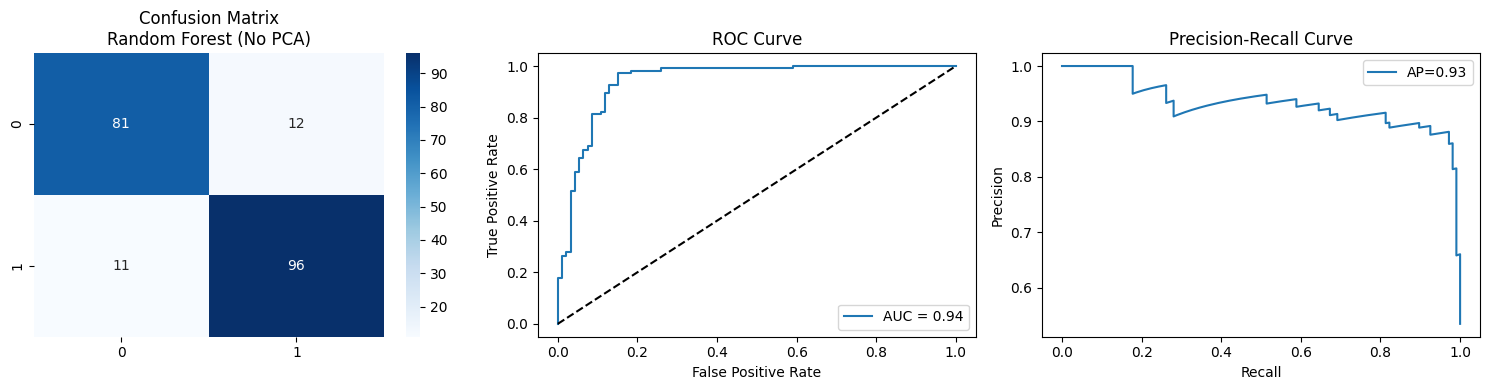


=== Random Forest (No PCA) ===
Best parameters: {'max_depth': np.int64(10), 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
CV Accuracy: 0.8949
Test Accuracy: 0.8850
Precision: 0.8850
Recall: 0.8850
F1 Score: 0.8850
ROC AUC: 0.9411

Tuning Gradient Boosting (No PCA)


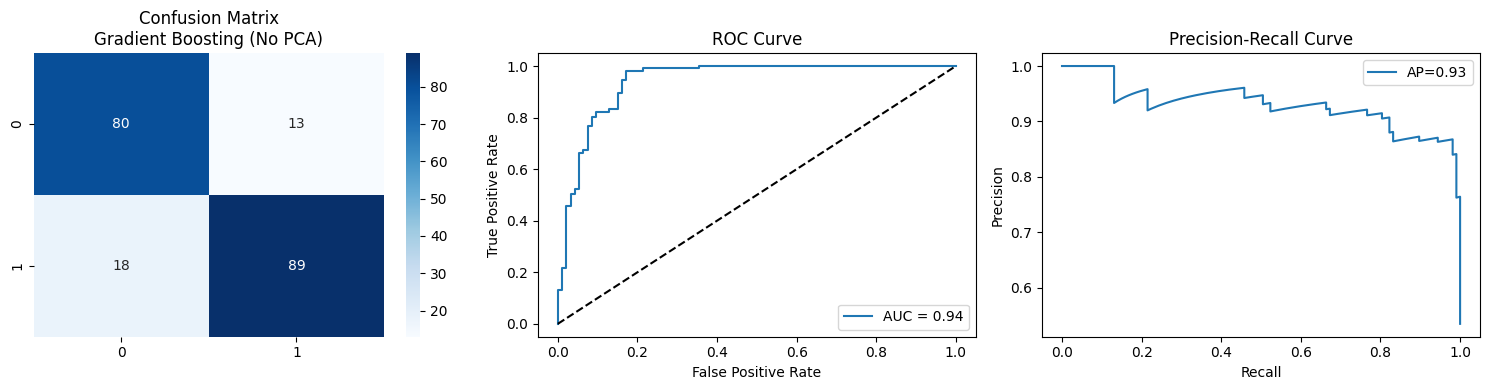


=== Gradient Boosting (No PCA) ===
Best parameters: {'learning_rate': np.float64(0.2764239633707395), 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 233}
CV Accuracy: 0.9007
Test Accuracy: 0.8450
Precision: 0.8464
Recall: 0.8450
F1 Score: 0.8452
ROC AUC: 0.9410

Tuning XGBoost (No PCA)


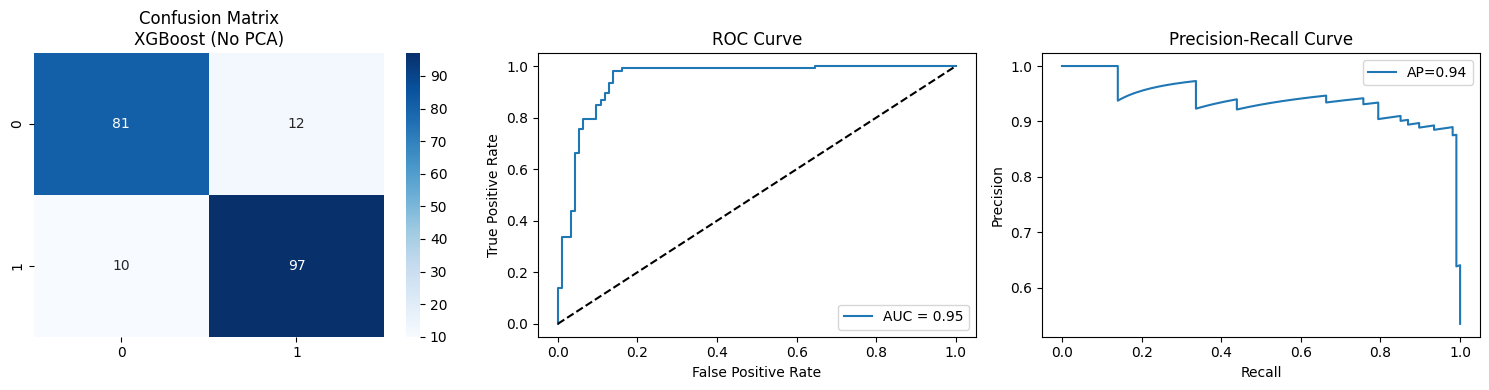


=== XGBoost (No PCA) ===
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': np.float64(0.01994942877962023), 'max_depth': 9, 'n_estimators': 219, 'subsample': 1.0}
CV Accuracy: 0.9065
Test Accuracy: 0.8900
Precision: 0.8900
Recall: 0.8900
F1 Score: 0.8899
ROC AUC: 0.9478

Tuning SVM (No PCA)


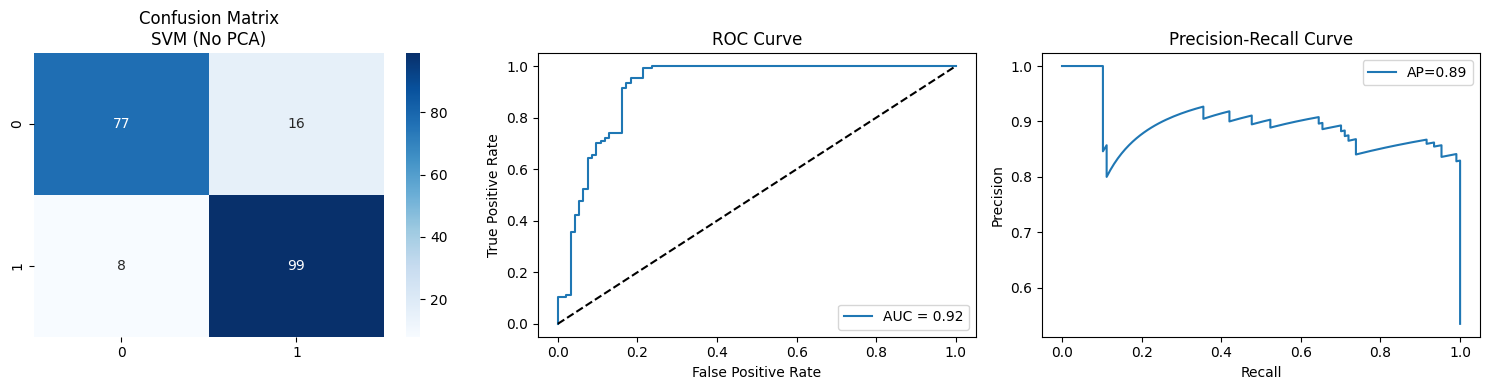


=== SVM (No PCA) ===
Best parameters: {'C': np.float64(1.8004668413421294), 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
CV Accuracy: 0.8787
Test Accuracy: 0.8800
Precision: 0.8818
Recall: 0.8800
F1 Score: 0.8795
ROC AUC: 0.9186

Tuning KNN (No PCA)


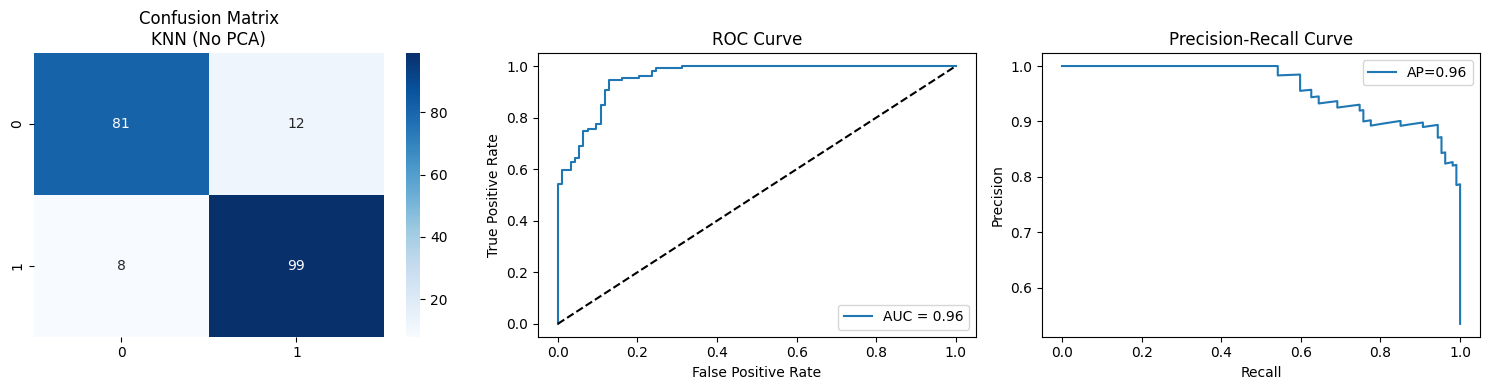


=== KNN (No PCA) ===
Best parameters: {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
CV Accuracy: 0.8926
Test Accuracy: 0.9000
Precision: 0.9004
Recall: 0.9000
F1 Score: 0.8998
ROC AUC: 0.9565

Voting Classifier without PCA Accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        93
           1       0.88      0.84      0.86       107

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [ ]:
def evaluate_without_pca():
    """Evaluate models without PCA transformation"""
    print("\n=== Running models without PCA ===")
    no_pca_results = {}

    for name, model in models.items():
        print(f"\nTuning {name} (No PCA)")
        result = tune_and_evaluate(
            model,
            param_grids[name],
            X_train_scaled, y_train,
            X_test_scaled, y_test,
            f"{name} (No PCA)"
        )
        no_pca_results[name] = result

    # Add voting classifier without PCA (using all models)
    voting_clf_no_pca = VotingClassifier(
        estimators=[

            ('rf', no_pca_results['Random Forest']['model']),
            ('gb', no_pca_results['Gradient Boosting']['model']),
            ('xgb', no_pca_results['XGBoost']['model'])

        ],
        voting='soft'
    )
    voting_clf_no_pca.fit(X_train_scaled, y_train)
    y_pred_no_pca = voting_clf_no_pca.predict(X_test_scaled)

    no_pca_results['Voting Classifier (All Models)'] = {
        'model': voting_clf_no_pca,
        'accuracy': accuracy_score(y_test, y_pred_no_pca),
        'precision': precision_score(y_test, y_pred_no_pca),
        'recall': recall_score(y_test, y_pred_no_pca),
        'f1': f1_score(y_test, y_pred_no_pca)
    }

    print(f"\nVoting Classifier without PCA Accuracy: {accuracy_score(y_test, y_pred_no_pca):.4f}")
    print(classification_report(y_test, y_pred_no_pca))

    return no_pca_results

# Run the evaluation without PCA
no_pca_results = evaluate_without_pca()

# 4. Visualization of Results

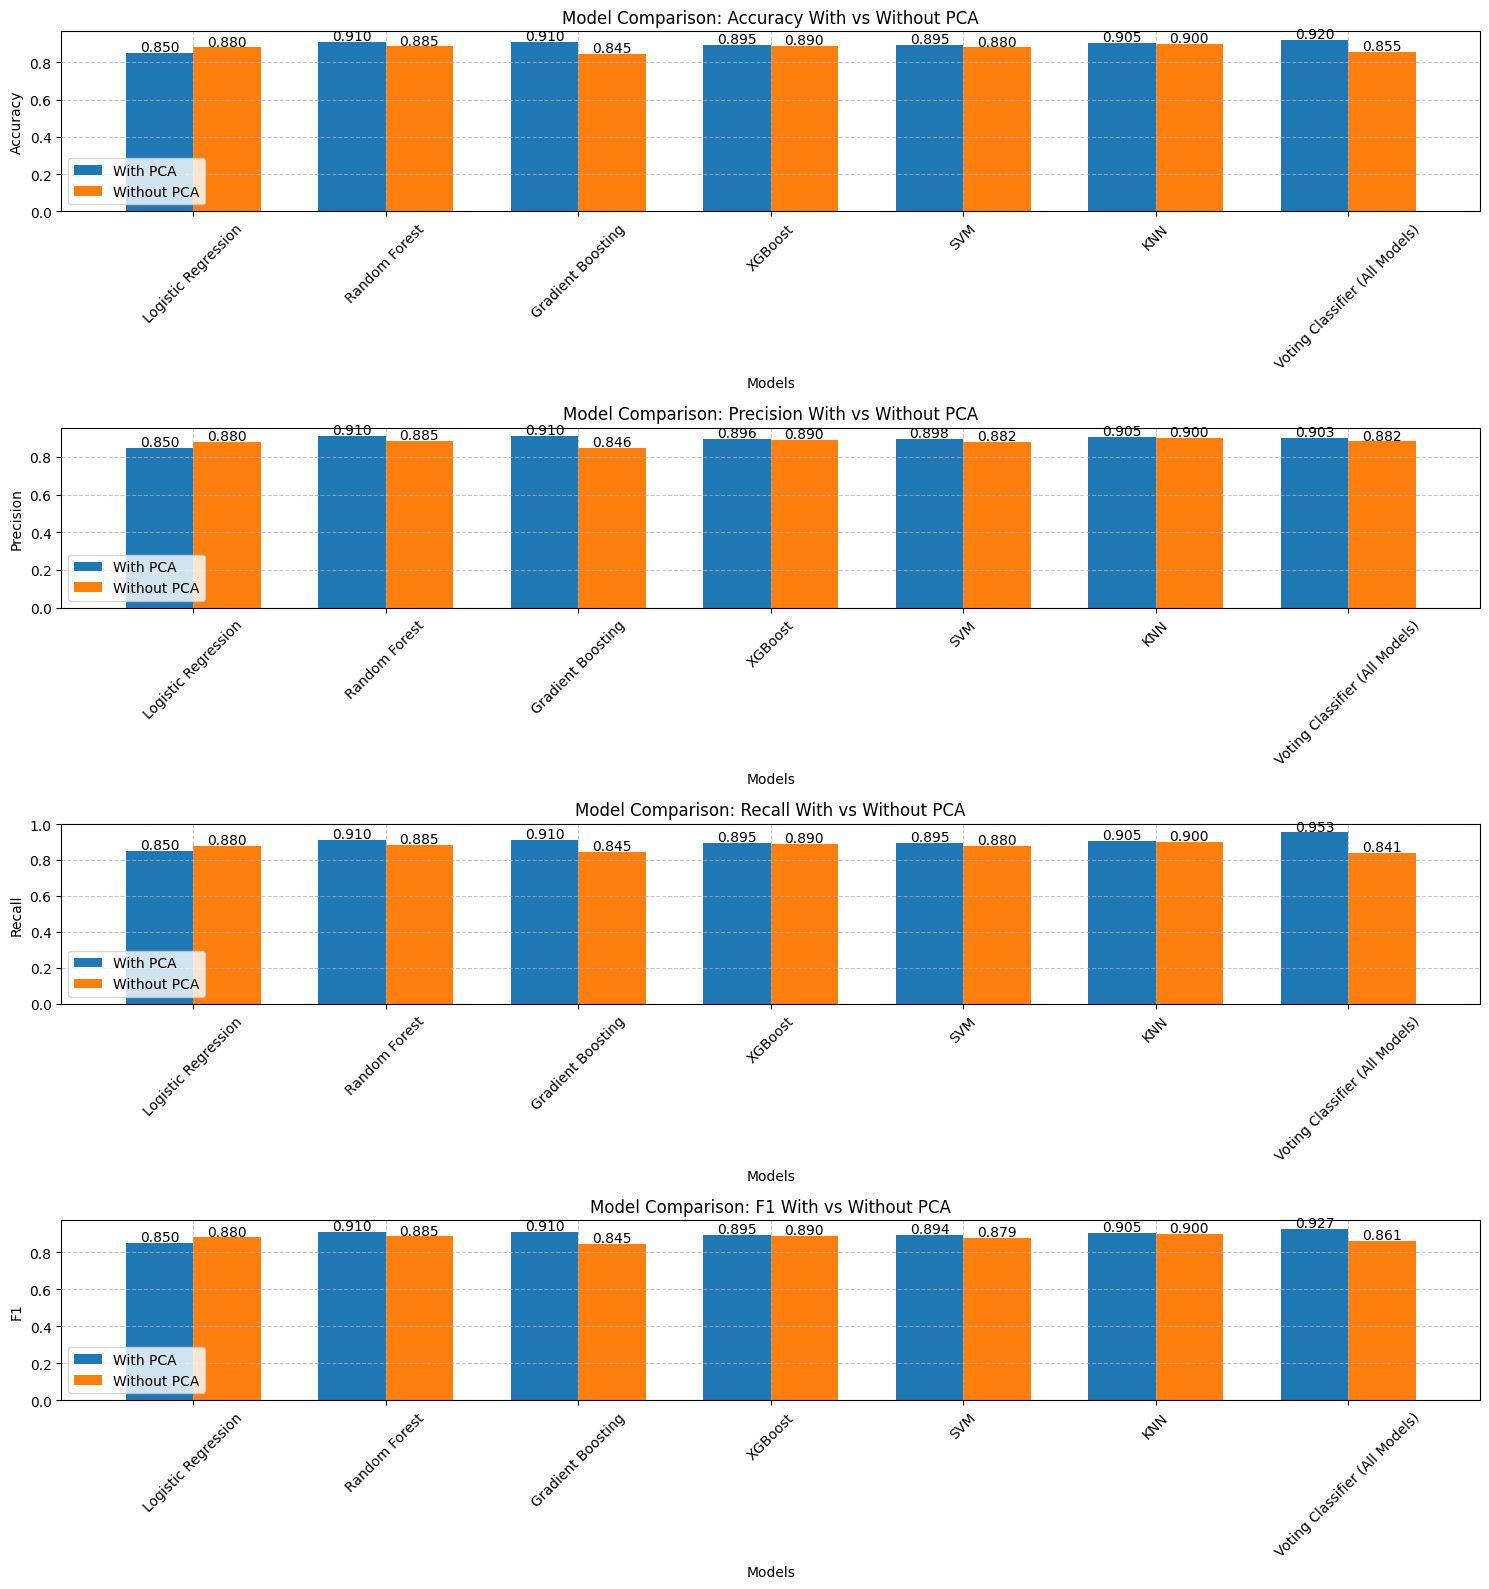

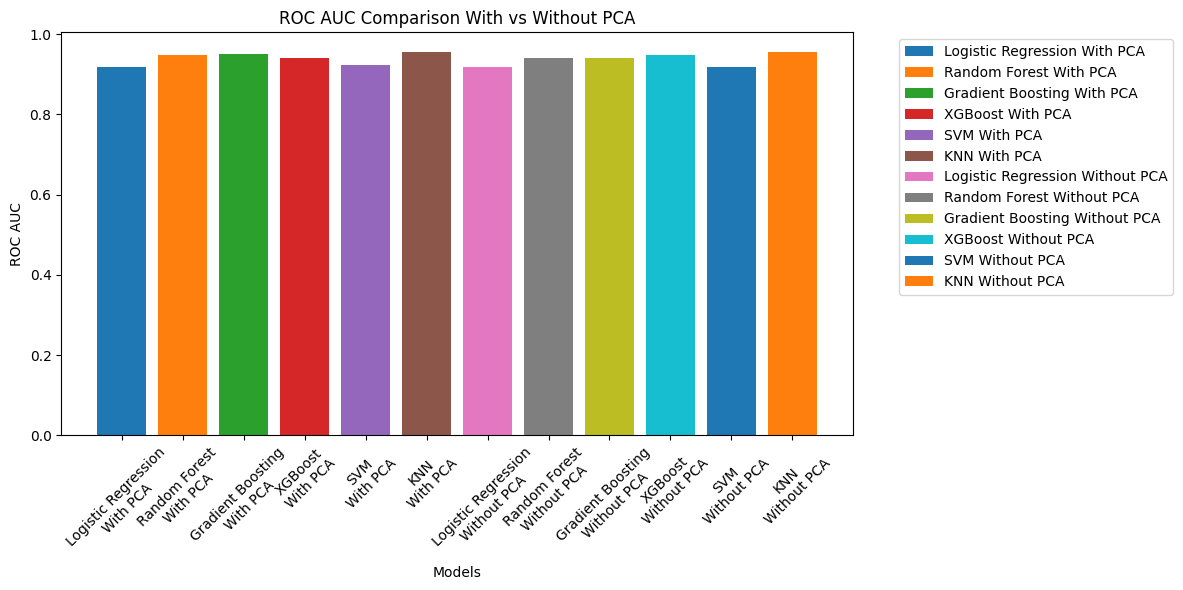


=== TOP 5 BEST PERFORMING MODELS ===

#1: Voting Classifier (All Models) (With PCA)
Accuracy: 0.9200
Precision: 0.9027
Recall: 0.9533
F1 Score: 0.9273

#2: Random Forest (With PCA)
Accuracy: 0.9100
Precision: 0.9104
Recall: 0.9100
F1 Score: 0.9098
ROC AUC: 0.9471

#3: Gradient Boosting (With PCA)
Accuracy: 0.9100
Precision: 0.9104
Recall: 0.9100
F1 Score: 0.9098
ROC AUC: 0.9504

#4: KNN (With PCA)
Accuracy: 0.9050
Precision: 0.9052
Recall: 0.9050
F1 Score: 0.9049
ROC AUC: 0.9567

#5: KNN (Without PCA)
Accuracy: 0.9000
Precision: 0.9004
Recall: 0.9000
F1 Score: 0.8998
ROC AUC: 0.9565


In [ ]:
def visualize_comparison(pca_results, no_pca_results):
    """Visualize comparison between PCA and non-PCA results"""
    # Combine results into comparison structure
    comparison_results = {
        'With PCA': pca_results,
        'Without PCA': no_pca_results
    }

    metrics = ['accuracy', 'precision', 'recall', 'f1']
    n_metrics = len(metrics)

    plt.figure(figsize=(15, 4*n_metrics))

    for i, metric in enumerate(metrics):
        plt.subplot(n_metrics, 1, i+1)

        # Prepare data for plotting
        scenarios = list(comparison_results.keys())
        model_names = list(comparison_results[scenarios[0]].keys())

        # Get metric values for each scenario
        values = {}
        for scenario in scenarios:
            values[scenario] = [comparison_results[scenario][name].get(metric, 0)
                              for name in model_names if metric in comparison_results[scenario][name]]

        # Plot settings
        x = np.arange(len(model_names))
        width = 0.35

        for j, scenario in enumerate(scenarios):
            plt.bar(x + j*width, values[scenario], width, label=scenario)

        plt.xlabel('Models')
        plt.ylabel(metric.capitalize())
        plt.title(f'Model Comparison: {metric.capitalize()} With vs Without PCA')
        plt.xticks(x + width/2, model_names, rotation=45)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Add value labels
        for scenario in scenarios:
            for k, v in enumerate(values[scenario]):
                plt.text(k + (0 if scenario == scenarios[0] else width),
                         v + 0.01,
                         f"{v:.3f}",
                         ha='center')

    plt.tight_layout()
    plt.show()

    # ROC AUC comparison
    plt.figure(figsize=(12, 6))
    for scenario in comparison_results:
        for name in comparison_results[scenario]:
            if 'roc_auc' in comparison_results[scenario][name]:
                plt.bar(f"{name}\n{scenario}",
                        comparison_results[scenario][name]['roc_auc'],
                        label=f"{name} {scenario}")

    plt.xlabel('Models')
    plt.ylabel('ROC AUC')
    plt.title('ROC AUC Comparison With vs Without PCA')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Find top 5 best performing models based on accuracy
    all_models = []
    for scenario in comparison_results:
        for name in comparison_results[scenario]:
            if 'accuracy' in comparison_results[scenario][name]:
                all_models.append({
                    'name': f"{name} ({scenario})",
                    'accuracy': comparison_results[scenario][name]['accuracy'],
                    'precision': comparison_results[scenario][name].get('precision', 0),
                    'recall': comparison_results[scenario][name].get('recall', 0),
                    'f1': comparison_results[scenario][name].get('f1', 0),
                    'roc_auc': comparison_results[scenario][name].get('roc_auc', 0)
                })

    # Sort by accuracy (descending)
    all_models_sorted = sorted(all_models, key=lambda x: x['accuracy'], reverse=True)

    # Print top 5 models
    print("\n=== TOP 5 BEST PERFORMING MODELS ===")
    for i, model in enumerate(all_models_sorted[:5], 1):
        print(f"\n#{i}: {model['name']}")
        print(f"Accuracy: {model['accuracy']:.4f}")
        print(f"Precision: {model['precision']:.4f}")
        print(f"Recall: {model['recall']:.4f}")
        print(f"F1 Score: {model['f1']:.4f}")
        if model['roc_auc']:
            print(f"ROC AUC: {model['roc_auc']:.4f}")

# Generate visualizations after getting both results
visualize_comparison(pca_results, no_pca_results)

# 5. Conclusion

---
## 📊 Key Findings

This project aimed to predict the presence of heart disease using machine learning classification algorithms applied to a cleaned and preprocessed dataset of 1,000 patients. The focus was on optimizing predictive accuracy while improving model efficiency and addressing data quality issues.

- The **Voting Classifier (All Models) with PCA** emerged as the best-performing model, achieving:
  - **Accuracy:** 92.00%
  - **Precision:** 90.27%
  - **Recall:** 95.33%
  - **F1 Score:** 92.73%

- Other strong contenders included:
  - **Random Forest with PCA** and **Gradient Boosting with PCA**, each achieving **91% accuracy**.
  - **KNN with PCA** achieved **90.5% accuracy**, improving upon its non-PCA version (90.0%).

- **Principal Component Analysis (PCA)** significantly boosted the performance of distance-based models like KNN and reduced dimensional noise for ensemble models. It also contributed to faster model training by compressing the 13 original features into fewer uncorrelated components without major loss in variance.

- Surprisingly, models like **KNN with PCA** outperformed more complex algorithms without PCA. This indicates that feature correlation and multicollinearity were hindering performance in the original space.

- **Hyperparameter tuning** Improved the accuracy of the models compared to the midterm.

---

## 🏥 Practical Implications

This model can be translated into actionable real-world applications within the healthcare sector:

- **Early Diagnosis Support:** High recall (95.33%) means the model rarely misses patients with heart disease, making it a valuable assistant to clinicians in initial diagnosis or screening workflows.
  
- **Resource Optimization:** Triage systems in hospitals and clinics can use this model to prioritize high-risk patients, especially where cardiologists or testing resources are limited.

- **Portable and Scalable:** With dimensionality reduction from PCA and ensemble voting, this model can be embedded in **mobile health apps**, **wearables**, or **cloud-based diagnostic systems** that process real-time patient data.

- **Data-driven Healthcare:** Clinicians can leverage insights from model results to better understand symptom-disease relationships and potentially uncover patterns missed by traditional diagnostics.

---

## ⚠️ Limitations

While the model is highly promising, several limitations must be addressed before real-world deployment:

- **Dataset Biases:** The dataset is imbalanced by gender (78% male), which may affect performance in underrepresented groups like females or younger patients.
  
- **Synthetic Oversampling (SMOTE):** While effective for balancing the target classes, SMOTE may introduce **unrealistic samples** that don’t reflect true physiological variability, potentially biasing the model.

- **Interpretability Trade-off:** PCA improves model performance but **obscures original feature relationships**, making it harder for clinicians to interpret why a prediction was made. This is a key concern in healthcare, where explainability is crucial.

- **Data Anomalies:** Implausible values like cholesterol or blood pressure of 0 required imputation. Although handled by median replacement, these issues raise concerns about initial data reliability and potential feature distortion.


---

## 🚀 Future Improvements

To refine and extend this work, several avenues can be explored:

- **Deep Learning Approaches:** Convolutional or dense neural networks (MLPs) could be tested to uncover nonlinear relationships and patterns beyond those captured by tree-based models.

- **Feature Engineering Enhancements:** Introduce new variables such as:
  - **Cholesterol/HDL ratio**
  - **Blood pressure categories (systolic vs. diastolic)**
  - **Lifestyle factors** like smoking, alcohol use, and physical activity (if available)

- **Real-time Monitoring:** Integrate the model into **wearable tech or IoT devices** for real-time predictions, enabling preventive interventions at scale.

- **Explainability Tools:** Use **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-Agnostic Explanations)** to explain predictions in a way clinicians can understand and trust.

- **Cross-Dataset Benchmarking:** Validate the model on external datasets from different hospitals or regions to ensure generalizability and robustness.

- **Ethical Auditing:** Ensure models are fair across demographics (e.g., gender, age, ethnicity), and conduct periodic audits to avoid discrimination or bias in predictions.

- **Clean Data**: Fix zeros in `cholesterol` and `resting bp s`.

---

## ✅ Final Takeaway

This project demonstrates the effectiveness of combining **data cleaning, feature engineering, PCA, ensemble modeling**, and **hyperparameter tuning** to build a robust and accurate heart disease prediction system. The best-performing model, the Voting Classifier with PCA, balances high recall, strong precision, and efficiency—making it suitable for deployment in healthcare settings. With thoughtful improvements, this model can evolve into a real-time, ethical, and clinically valuable AI assistant.
"""
